<a href="https://colab.research.google.com/github/aneeshsai007/AAPLPrice/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
print('ASV')

ASV


In [ ]:
from google.colab import files
files.upload()
df = pd.read_csv('AAPL.csv')

Saving AAPL.csv to AAPL.csv


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...,...
2415,2021-08-09,146.199997,146.699997,145.520004,146.089996,146.089996,48908700
2416,2021-08-10,146.440002,147.710007,145.300003,145.600006,145.600006,68922200
2417,2021-08-11,146.050003,146.720001,145.529999,145.860001,145.860001,48422100
2418,2021-08-12,146.190002,149.050003,145.839996,148.889999,148.889999,72282600


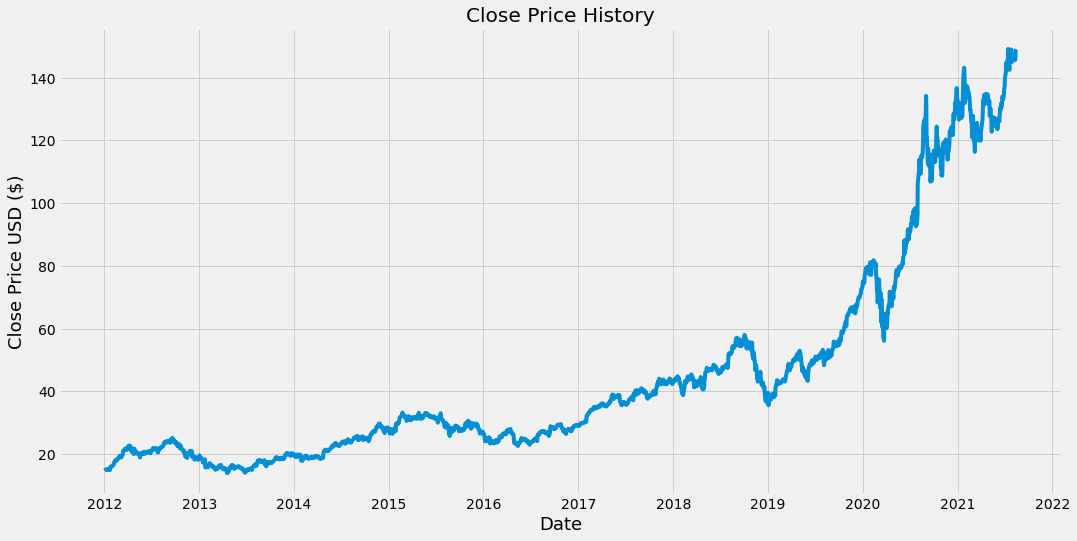

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize= (16,8))
plt.title('Close Price History')
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [ ]:
# Create a new data frame with only the Close column

data = df.filter(['Close'])
# Conver the data frame to a numpy array
dataset = data.values
# Get the number of rows to train out model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1936

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00546799],
       [0.00605177],
       [0.00726424],
       ...,
       [0.97566618],
       [0.998077  ],
       [0.99963027]])

In [ ]:
# Create the training dataset
# Create the scale training dataset
train_data = scaled_data[0:training_data_len]
# Split data into x_train and y_train
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00546799, 0.00605177, 0.00726424, 0.00841859, 0.00824161,
       0.00864048, 0.00845821, 0.00815179, 0.00773443, 0.00902614,
       0.01019106, 0.00983182, 0.00786386, 0.009742  , 0.00789292,
       0.01482697, 0.01429073, 0.01499074, 0.01650434, 0.01742095,
       0.01734435, 0.01706171, 0.01826625, 0.01939946, 0.02068326,
       0.02275687, 0.02711277, 0.02717881, 0.02960375, 0.03141584,
       0.02830147, 0.02950072, 0.02947696, 0.03283964, 0.03236151,
       0.03324642, 0.03483663, 0.03572155, 0.03827064, 0.04012763,
       0.04066387, 0.04085143, 0.0376763 , 0.03691024, 0.03702384,
       0.04000878, 0.04084879, 0.04265296, 0.04690584, 0.05257987,
       0.05151796, 0.0515206 , 0.05562292, 0.05690672, 0.05599273,
       0.05515801, 0.05428894, 0.05717613, 0.0591573 , 0.05998675])]
[0.05793690462544279]

[array([0.00546799, 0.00605177, 0.00726424, 0.00841859, 0.00824161,
       0.00864048, 0.00845821, 0.00815179, 0.00773443, 0.00902614,
       0.01019106, 0.00983182, 0.00

In [ ]:
# Convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

# Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1876/1876 [==============================] - 57s 21ms/step - loss: 4.8848e-04


In [ ]:
# Create the testing dataset
test_data = scaled_data[training_data_len-60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# Get the root mean squared error (RMSE) --> standard deviation of the residuals
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse
# score of 0.26765512219238263

0.26765512219238263

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


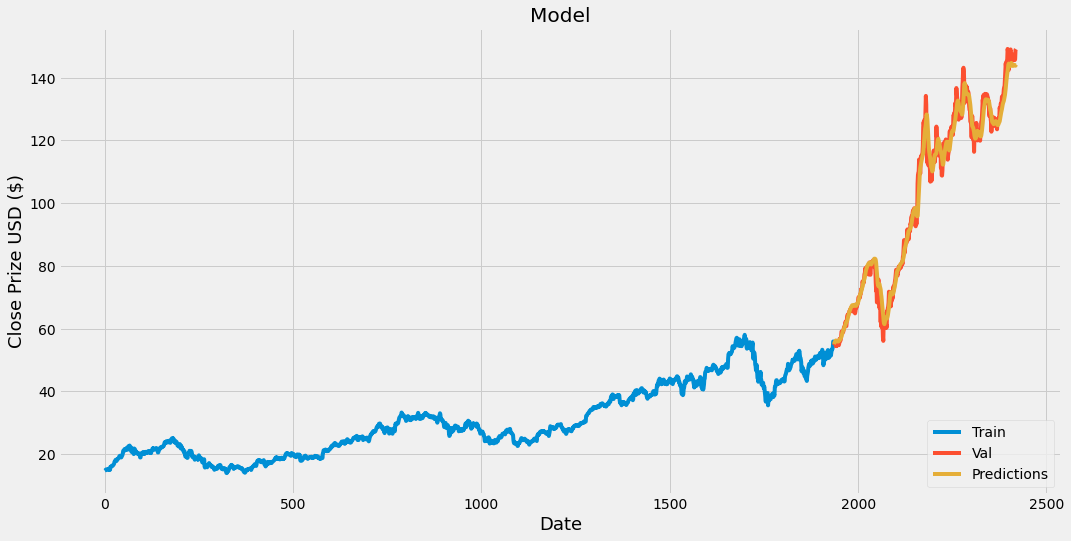

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Prize USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
1936,54.687500,55.056553
1937,54.974998,55.435192
1938,55.174999,55.700443
1939,55.692501,55.898911
1940,55.240002,56.104912
...,...,...
2415,146.089996,144.081863
2416,145.600006,144.043198
2417,145.860001,143.914551
2418,148.889999,143.802185


In [ ]:
# Get the quote
from google.colab import files
files.upload()
apple_quote = pd.read_csv('AAPL.csv')
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

Saving AAPL.csv to AAPL (2).csv
[[144.62074]]
